# Visualization of a Geomagnetic Field Vector and a FAST Pointing Direction

In [1]:
import sys
sys.path.append("../../geomagnetic")
from geomagnetic import geomagnetic as gmag
from geomagnetic import telescope as gtel
from geomagnetic import math as gmath
import matplotlib.pyplot as plt
import numpy as np
### set a default font
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'Times New Roman'

## Defining a geomagnetic field

You can directly set geomagnetic field values as

```python
gmfld = gmag.Geomagneticfield()
gmfld.set_field(intensity=48338, inc_deg=62.26649, dec_deg=13.38603)
```

or use a method to load a geomagnetic model file as 

```python
gmfld = gmag.Geomagnrticfield()
gmfld.load_model("../json/modelname.json")
```

you can check your input by 

```python
gmfld.show_field()
```


In [2]:
gmfld = gmag.Geomagneticfield()
gmfld.load_model("../json/TA-BR.json")
gmfld.show_field()

Intensity: 48338.2 nT, Declination: 13.38603 deg, Inclination: 62.26649 deg


## Defining a telescope pointing

One can directly set telescope elevation and azimuth as a dictionary.

The dictionary should be

```python
pointing["elevation"] = elevation
pointing["azimuth"] = azimuth
```

or you just load telescope pointing information from a json file

```python
telescope = tel.TelescopePointing()
telescope.load_telescopes("../json/telescope.json")
print("##### Telescopes #####")
print(telescope.get_telescopes().keys())
pointing = telescope.get_telescopes()["TelescopeName"]
```



In [3]:
telescope = gtel.TelescopePointing()
telescope.load_telescopes("../json/telescope.json")
print("##### Telescopes #####")
print(telescope.get_telescopes().keys())
telname = "FAST@TA-2"
pointing = telescope.get_telescopes()[telname]

##### Telescopes #####
dict_keys(['FAST@TA-1', 'FAST@TA-2', 'FAST@TA-3'])


## Magnetic field calculation

In [4]:
mag_vec, ax_vec = gmath.calculate_field(mag=gmfld.get_vector(),point=pointing)

Telescope pointing: 15.1 deg, 59.76 deg
normal vector for the 1st rotation: [0. 0. 1.]
rotation matrix for the 1st rotation:
[[ 0.5036232  -0.86392342  0.        ]
 [ 0.86392342  0.5036232   0.        ]
 [ 0.          0.          1.        ]]
normal vector for the 2nd rotation: [0.5036232  0.86392342 0.        ]
rotation matrix for the 2nd rotation:
[[ 0.44806743  0.32174848 -0.83409441]
 [ 0.32174848  0.81243708  0.48623442]
 [ 0.83409441 -0.48623442  0.26050451]]
camera x axis: [0.5036232  0.86392342 0.        ]
camera y axis: [-0.22505595  0.13119611 -0.96547263]
camera z axis: [-0.83409441  0.48623442  0.26050451]
geo magnetic filed: [  5207.75358444  21883.52814854 -42785.18525864]
geo magnetic field for the telescope: [21528.43795185 43006.92333712 -4848.96727857]


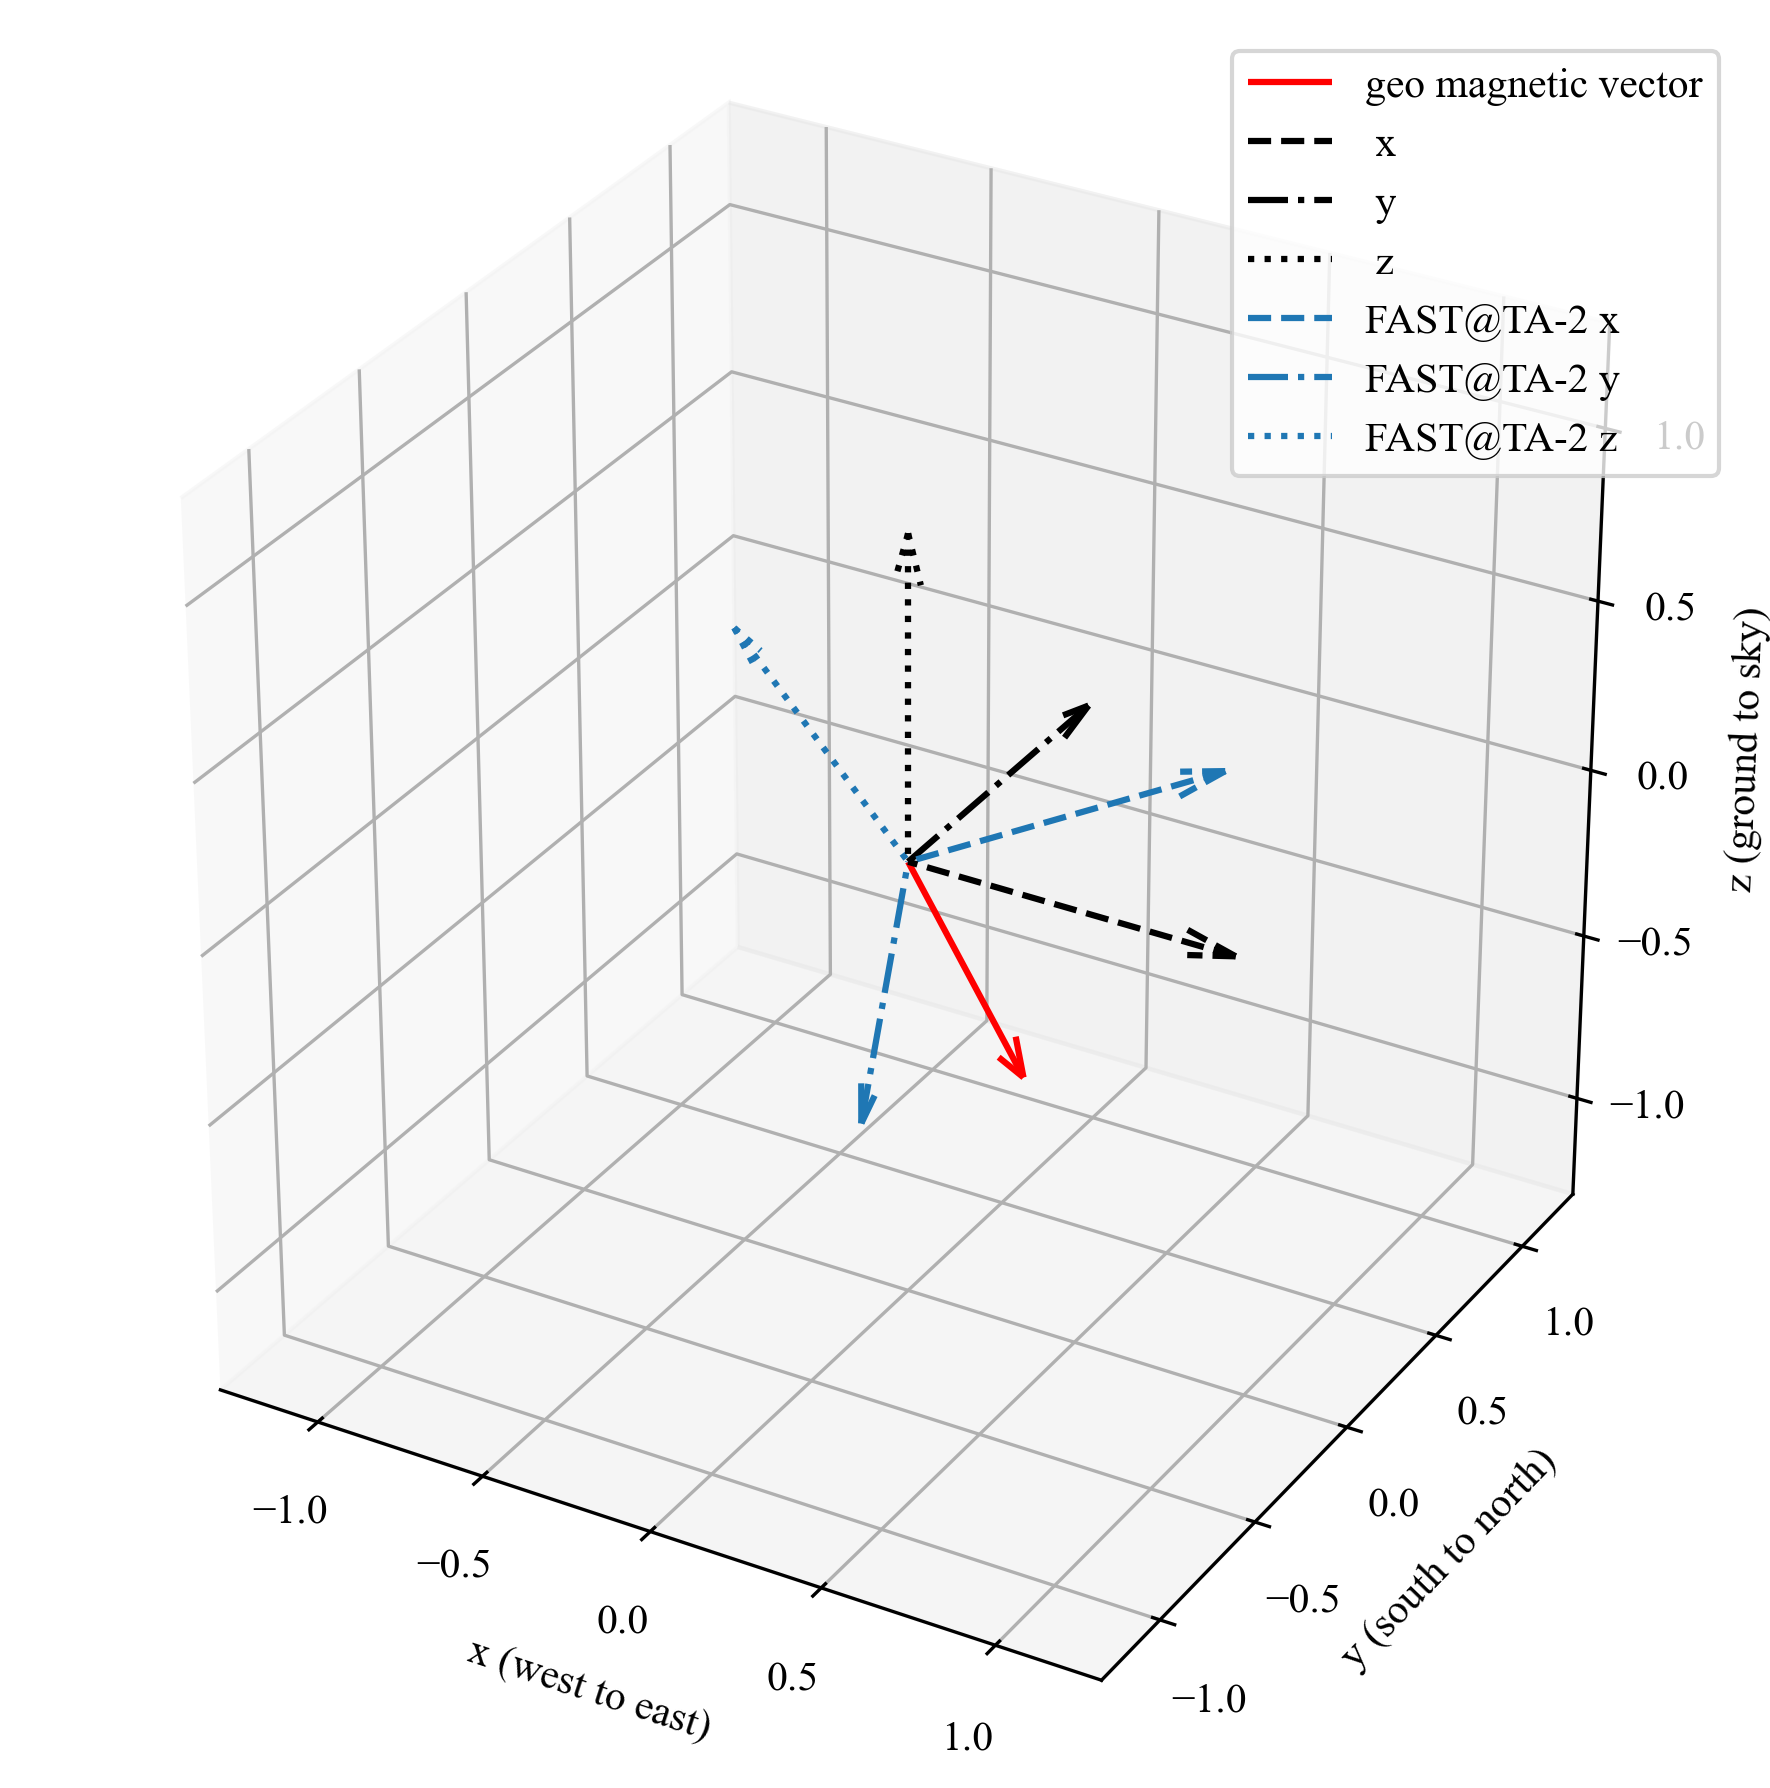

In [5]:
def plot_telescope_axis(loc,ex,ey,ez,color,tel):
    ax.quiver(loc[0], loc[1], loc[2], ex[0],ex[1],ex[2], color = color, linestyle = '--', length = 0.95, arrow_length_ratio = 0.15,label=tel+' x')
    ax.quiver(loc[0], loc[1], loc[2], ey[0],ey[1],ey[2], color = color, linestyle = '-.', length = 0.95, arrow_length_ratio = 0.15,label=tel+' y')
    ax.quiver(loc[0], loc[1], loc[2], ez[0],ez[1],ez[2], color = color, linestyle = ':' , length = 0.95, arrow_length_ratio = 0.15,label=tel+' z')



fig = plt.figure(figsize = (6, 6),dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x (west to east)")
ax.set_ylabel("y (south to north)")
ax.set_zlabel("z (ground to sky)")
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.set_zlim(-1.3, 1.3)
loc = [0, 0, 0]



unit_mag = gmfld.get_vector()/np.linalg.norm(gmfld.get_vector())
ax.quiver(loc[0], loc[1], loc[2], unit_mag[0], unit_mag[1], unit_mag[2], color = 'red', linestyle = '-',length = 0.95, arrow_length_ratio = 0.15,label='geo magnetic vector')

orig = np.identity(3).T
plot_telescope_axis(loc,orig[0],orig[1],orig[2],'black','')
plot_telescope_axis(loc,ax_vec.T[0],ax_vec.T[1],ax_vec.T[2],'C0',telname)
#plot_telescope_axis(loc,expp2,eypp2,ezpp2,'C1','FAST2')
#plot_telescope_axis(loc,expp3,eypp3,ezpp3,'C2','FAST3')


ax.set_aspect('equal', 'box')


##### Select a view angle #####

# from sky
# elevation and azimuth is from east vector
#ax.view_init(elev=90, azim=-90, roll=0)

# from east
#ax.view_init(elev=0, azim=0, roll=0)

# from telescope next
# almost -y to z plane
#ax.view_init(azim=pointing["azimuth"],elev=0)

# FAST yz
#ax.view_init(elev=0, azim=pointing["azimuth"], roll=-pointing["elevation"])

# FAST xy
#ax.view_init(elev=-pointing["elevation"], azim=-90+pointing["azimuth"], roll=0)

# FAST xz
#ax.view_init(elev=-pointing["elevation"]+90, azim=-90+pointing["azimuth"], roll=0)

plt.legend()
plt.tight_layout()
plt.show()